In [35]:
import csv

dat_folder = './'
files = ['edge.log','cloud.log','edge-server.log']
header = ['time', 'latency', 'size']


for file in files:
    i = 0
    time = 0
    data = []
    with open(dat_folder + file, "r") as to_read:
        for l in to_read.readlines():
            if 'Time' in l: pass
            elif '------' in l:
                with open(dat_folder + file.split('.')[0] + "_csv/" + "run_" + file.split('.')[0] + "_" + str(i), 'w', encoding='UTF8') as to_write:
                    writer = csv.writer(to_write)
                    writer.writerow(header)
                    for d in data:
                        writer.writerow(d)
                i = i + 1
                data = []
                time = 0
            else:
                x = l[:-2].split("(")[-1].split(",")
                lat, by = float(x[0]), float(x[1]) / 10**6
                data.append([time,lat,by])
                time = time + 3

In [117]:
import pandas as pd
import os 

scenarios = ['edge_csv/', 'cloud_csv/', 'edge-server_csv/']

column_names = [
    "Time",
    "Latency (ms)",
    "Size (MB)"
]

usecols = [0,1,2]
dfs_dict = {}

for s in scenarios:
    dfs_list = []
    for file in os.listdir(dat_folder + s):
        if not os.path.isdir(dat_folder + s + file):
            df = pd.read_csv(
                dat_folder + s +file, 
                sep=',',
                usecols=usecols,
                names=column_names,
                skiprows=[0])
            dfs_list += [df]
    dfs_dict[s[:-1]] = dfs_list

In [118]:
dfs = {}
for s in scenarios:
    dfs_groupby = pd.concat(dfs_dict[s[:-1]]).groupby('Time')
    dfs[s[:-1]] = (dfs_groupby.mean(), dfs_groupby.std(), dfs_groupby.median(), dfs_groupby.max(), dfs_groupby.min())
dfs['edge-server_csv'][3].reset_index()

,Time,Latency (ms),Size (MB)
0,-1,0.000000,0.000000
1,0,3791.666667,22.216483
2,3,568.620347,22.500000
3,6,449.818182,12.500000
4,9,2892.452830,12.053571
5,12,281.944444,1.390000
6,15,1292.857143,1.428704
7,18,46563.333333,73.593750
8,21,245.217391,2.717356
9,24,5853.488372,22.083333


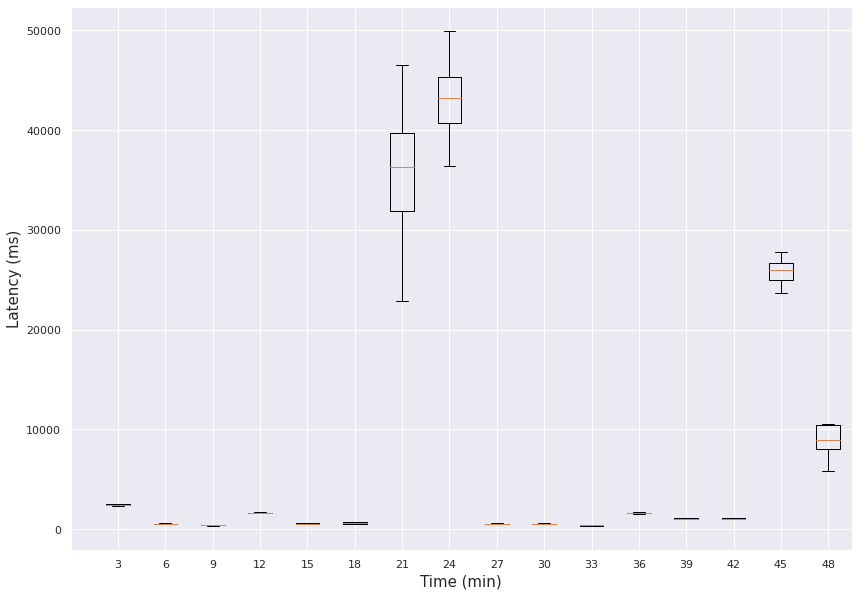

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)

scenario = 'edge-server_csv'    #rembember to change this
col = 'Latency (ms)'      #rembember to change this
save_label = 'edge-server_latency' #rembember to change this
#legend = 'Latency'  #rembember to change this'
all_data = []
for i in range(len(df[col])):
    data = []
    for df in dfs_dict[scenario]:
        data += [df[col][i]]
    all_data += [data]

box = ax.boxplot(all_data,0,'')

#ax.legend(box['boxes'], [legend], loc='upper right', ncol=1, frameon=False, prop={'size':15})
ax.set_xlim(0, 16.5)
#ax.set_xticks(range(0,121,5))
ax.set_xticklabels([(i+1) * 3 for i in range(16)])
ax.set_xlabel('Time (min)')
ax.set_ylabel(col)
ax.xaxis.get_label().set_size(15)
ax.yaxis.get_label().set_size(15)
plt.show()

In [60]:
fig.savefig(f'images/{save_label}.pdf', dpi=100)

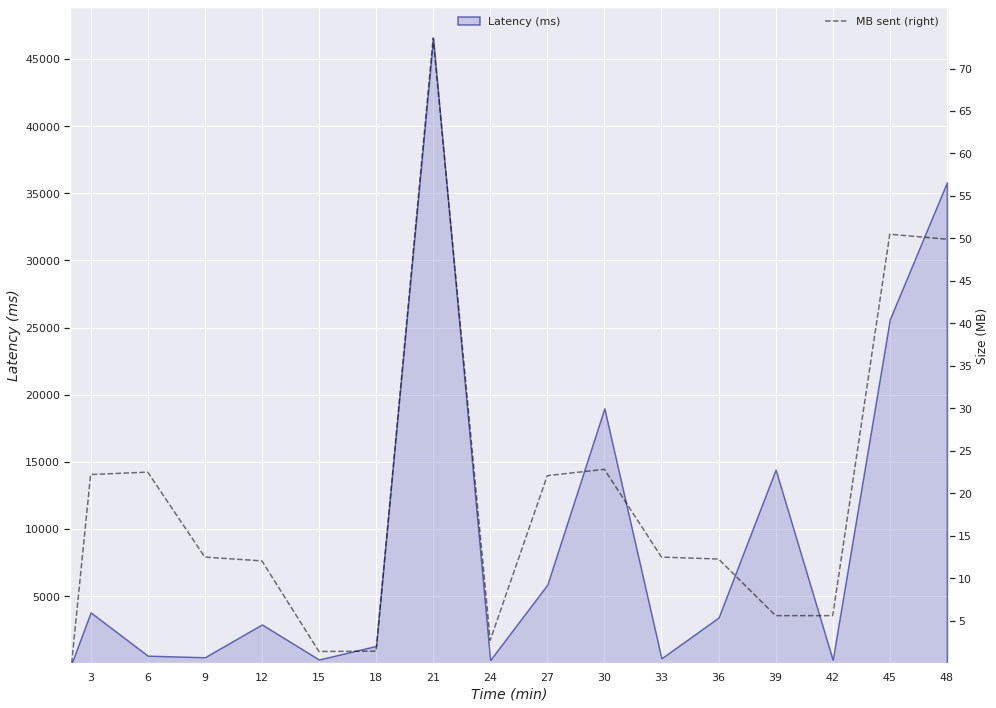

<Figure size 432x288 with 0 Axes>

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

sns.set(font='Jetbrains Mono')

x = dfs['edge-server_csv'][0].reset_index()['Time']
y_size = dfs['edge-server_csv'][0].reset_index()['Size (MB)']
y_lat = dfs['edge-server_csv'][0].reset_index()['Latency (ms)']

fig = plt.figure(figsize=[14,10])
ax = plt.subplot(111)
ax_background = ax.twinx()
ax_background.grid(False)

byte = ax_background.plot(x, y_size, linestyle='dashed', label='MB sent (right)', color='black', zorder=0, alpha=.55)

l = ax.fill_between(
    x, 
    y_lat, 
    linestyle='solid', 
    label='Latency (ms)', 
    zorder=10,
)

l.set_facecolors([[.5,.5,.8,.35]])
l.set_edgecolors([[0, 0, .5, .55]])
l.set_linewidths([1.5])

ax.set_xticks(range(0,51,3))
ax.set_xlim(-1.1,45.1)
ax.set_yticks(range(5000,50000,5000))
ax_background.set_yticks(range(5,75,5))



ax_background.set_ylabel('Size (MB)')


ax.set_ylabel('Latency (ms)')
ax.set_xlabel('Time (min)')
ttl = ax.title
ttl.set_weight('bold')

# tweak the axis labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()
xlab.set_style('italic')
xlab.set_size(14)
ylab.set_style('italic')
ylab.set_size(14)

ax.legend(loc='upper center', ncol=1, frameon=False)
ax_background.legend(loc='upper right', ncol=1, frameon=False)
ax.set_ylim(0)
ax_background.set_ylim(0)
ax.set_xticklabels([str((i+1)*3) for i in range(17)])

plt.tight_layout()
plt.show()
plt.draw()

In [139]:
fig.savefig(f'images/edge-server_plot.pdf', dpi=100)